In [1]:
import cv2
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from loguru import logger 
import rioxarray as rxr
import natsort

import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("/home/sebastien/Documents/projects/solafune-finding-mining-sites/data_splits/dataset_path.csv")
df.head(5)

,Unnamed: 0,image_path,target
0,0,/home/sebastien/Documents/projects/solafune-fi...,0
1,1,/home/sebastien/Documents/projects/solafune-fi...,0
2,2,/home/sebastien/Documents/projects/solafune-fi...,0
3,3,/home/sebastien/Documents/projects/solafune-fi...,1
4,4,/home/sebastien/Documents/projects/solafune-fi...,0


In [47]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))


def image_preprocessing(image_path):

    image = rxr.open_rasterio(image_path, masked=False).values
    red = image[3,:,:]
    green = image[2,:,:]
    blue = image[1,:,:]
    red_n = normalize(red)
    green_n = normalize(green)
    blue_n = normalize(blue)
    rgb_composite_n= np.dstack((red_n, green_n, blue_n))
    return rgb_composite_n


def visualization(df,choice):
    
    random_choice = int(random.choice(np.arange(0,len(df),1)))

    image_path = df['image_path'].iloc[choice]
    image = rxr.open_rasterio(image_path, masked=False).values

    
    red = image[3,:,:]
    green = image[2,:,:]
    blue = image[1,:,:]
    
    red = normalize(red)
    green = normalize(green)
    blue = normalize(blue)
    rgb_composite_n= np.dstack((red, green, blue))

    print("image path {}".format(image_path))
    print("image {}".format(rgb_composite_n.shape))

    
    
    # Create a figure with subplots to display the images
    plt.figure(figsize=(15, 5))
    
    # Display the images
    plt.imshow(rgb_composite_n)
    plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()
    

image path /home/sebastien/Documents/projects/solafune-finding-mining-sites/data/train/train_198.tif
image (512, 512, 3)


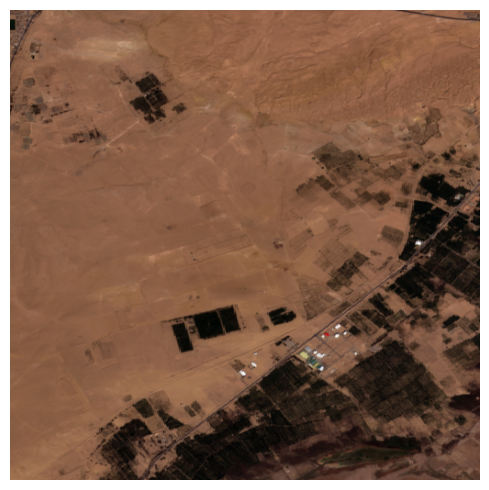

In [48]:
visualization(df, choice=198)

target: 0


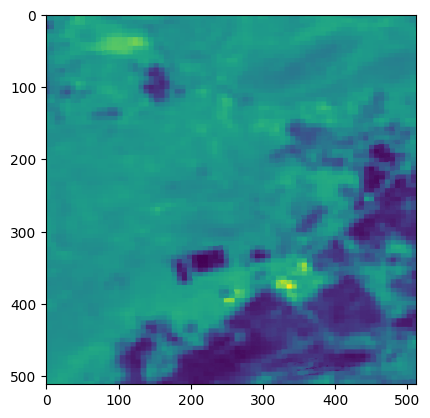

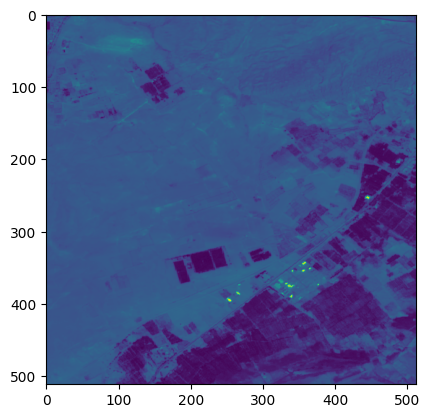

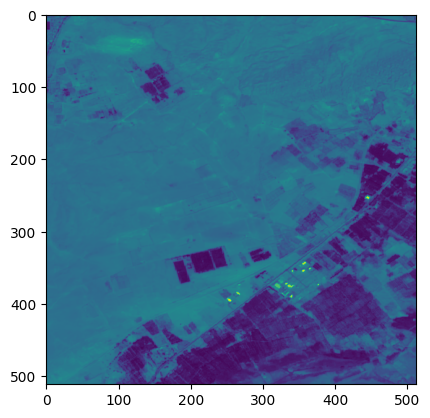

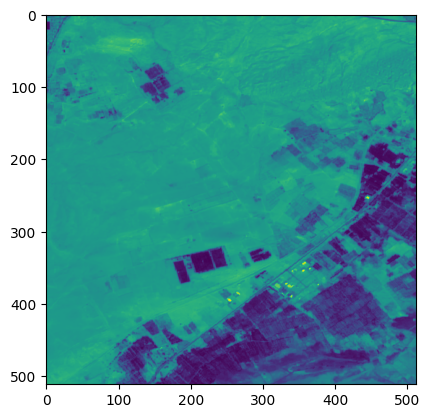

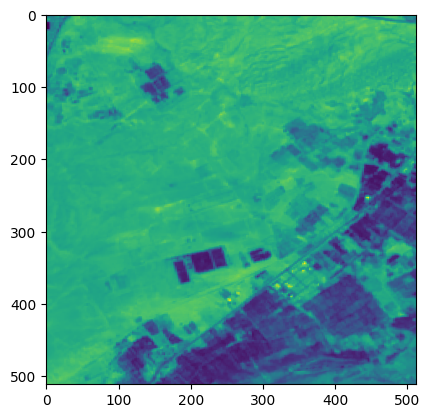

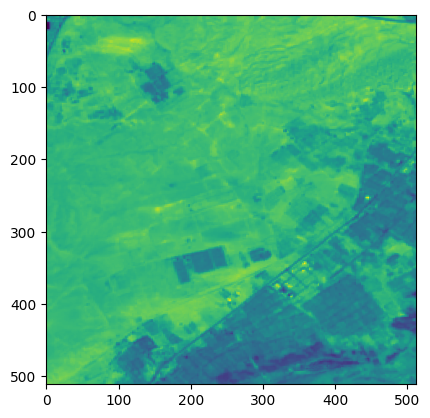

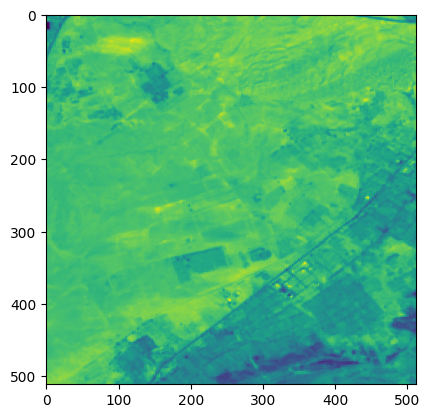

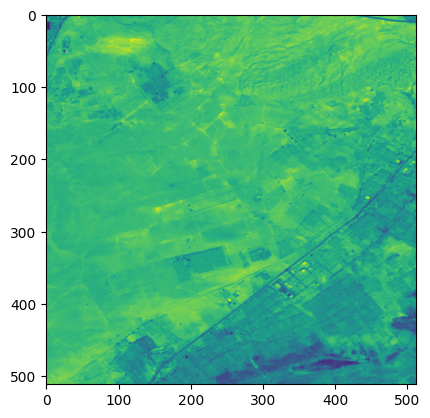

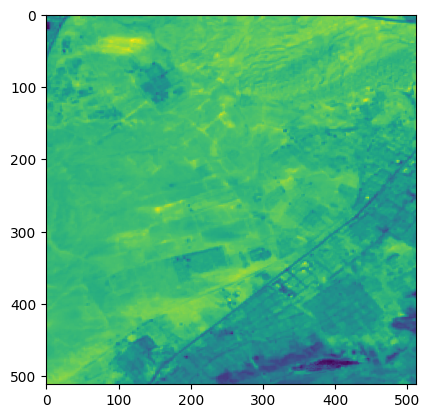

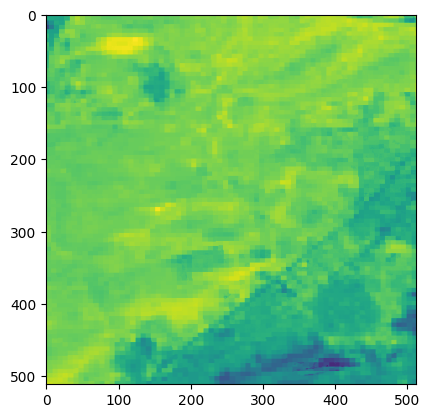

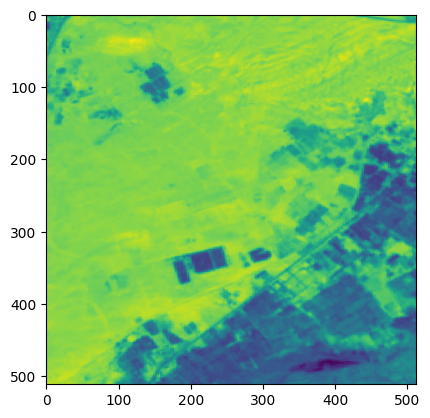

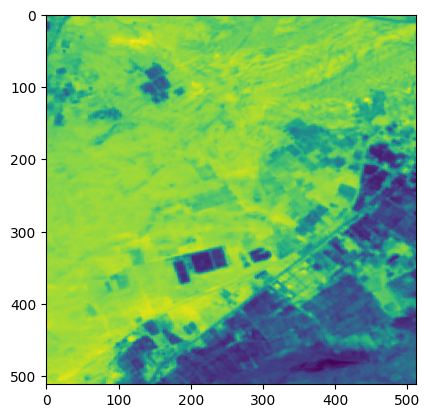

In [49]:
data = rxr.open_rasterio(df['image_path'].iloc[198], masked=False)
print(f"target: {df['target'].iloc[198]}")
image = data.values
for i in range(image.shape[0]):
    plt.imshow(image[i,:,:])
    plt.show()

## ImageNet
- mean = [0.485, 0.456, 0.406]
- std = [0.229, 0.224, 0.225]

In [50]:
mean_r = []
mean_g = []
mean_b = []

std_r = []
std_g = []
std_b = []

for i in tqdm(range(len(df))):

    image_path = df.iloc[i]['image_path']
    image = rxr.open_rasterio(image_path, masked=False).values
    red = image[3,:,:]
    green = image[2,:,:]
    blue = image[1,:,:]
    mean_r.append(red.mean())
    mean_g.append(green.mean())
    mean_b.append(blue.mean())
    std_r.append(red.std())
    std_g.append(green.std())
    std_b.append(blue.std())

  0%|          | 0/1239 [00:00<?, ?it/s]

In [52]:
mean = [np.mean(mean_r),np.mean(mean_g), np.mean(mean_b)]
std  = [np.mean(std_r),np.mean(std_g),np.mean(std_b)]

In [53]:
# [0.13799362, 0.12012463, 0.09399955]
# [0.038435966, 0.030695442, 0.027098808]

[0.13844758, 0.12010071, 0.093790114]
